In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

Цветовая палитра основана на спортивной форме героев.


> #ef7124 - оранжевый, #3b3d4c - серый



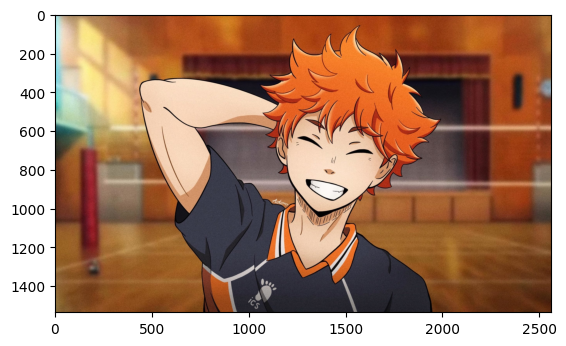

In [ ]:
img = plt.imread('pic.jpg')
plt.imshow(img)

Dropdown(description='Hero 1', options=('Акане Ямамото', 'Акинори Коноха', 'Акира Куними', 'Акитеру Цукишима',…

Dropdown(description='Hero 2', index=1, options=('Акане Ямамото', 'Акинори Коноха', 'Акира Куними', 'Акитеру Ц…

Dropdown(description='X Axis:', index=1, options=('power', 'jumps', 'endurance', 'strategy', 'technique', 'spe…

Dropdown(description='Y Axis:', options=('power', 'jumps', 'endurance', 'strategy', 'technique', 'speed'), val…

<ipython-input-133-be2351244990>:62: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-133-be2351244990>:85: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



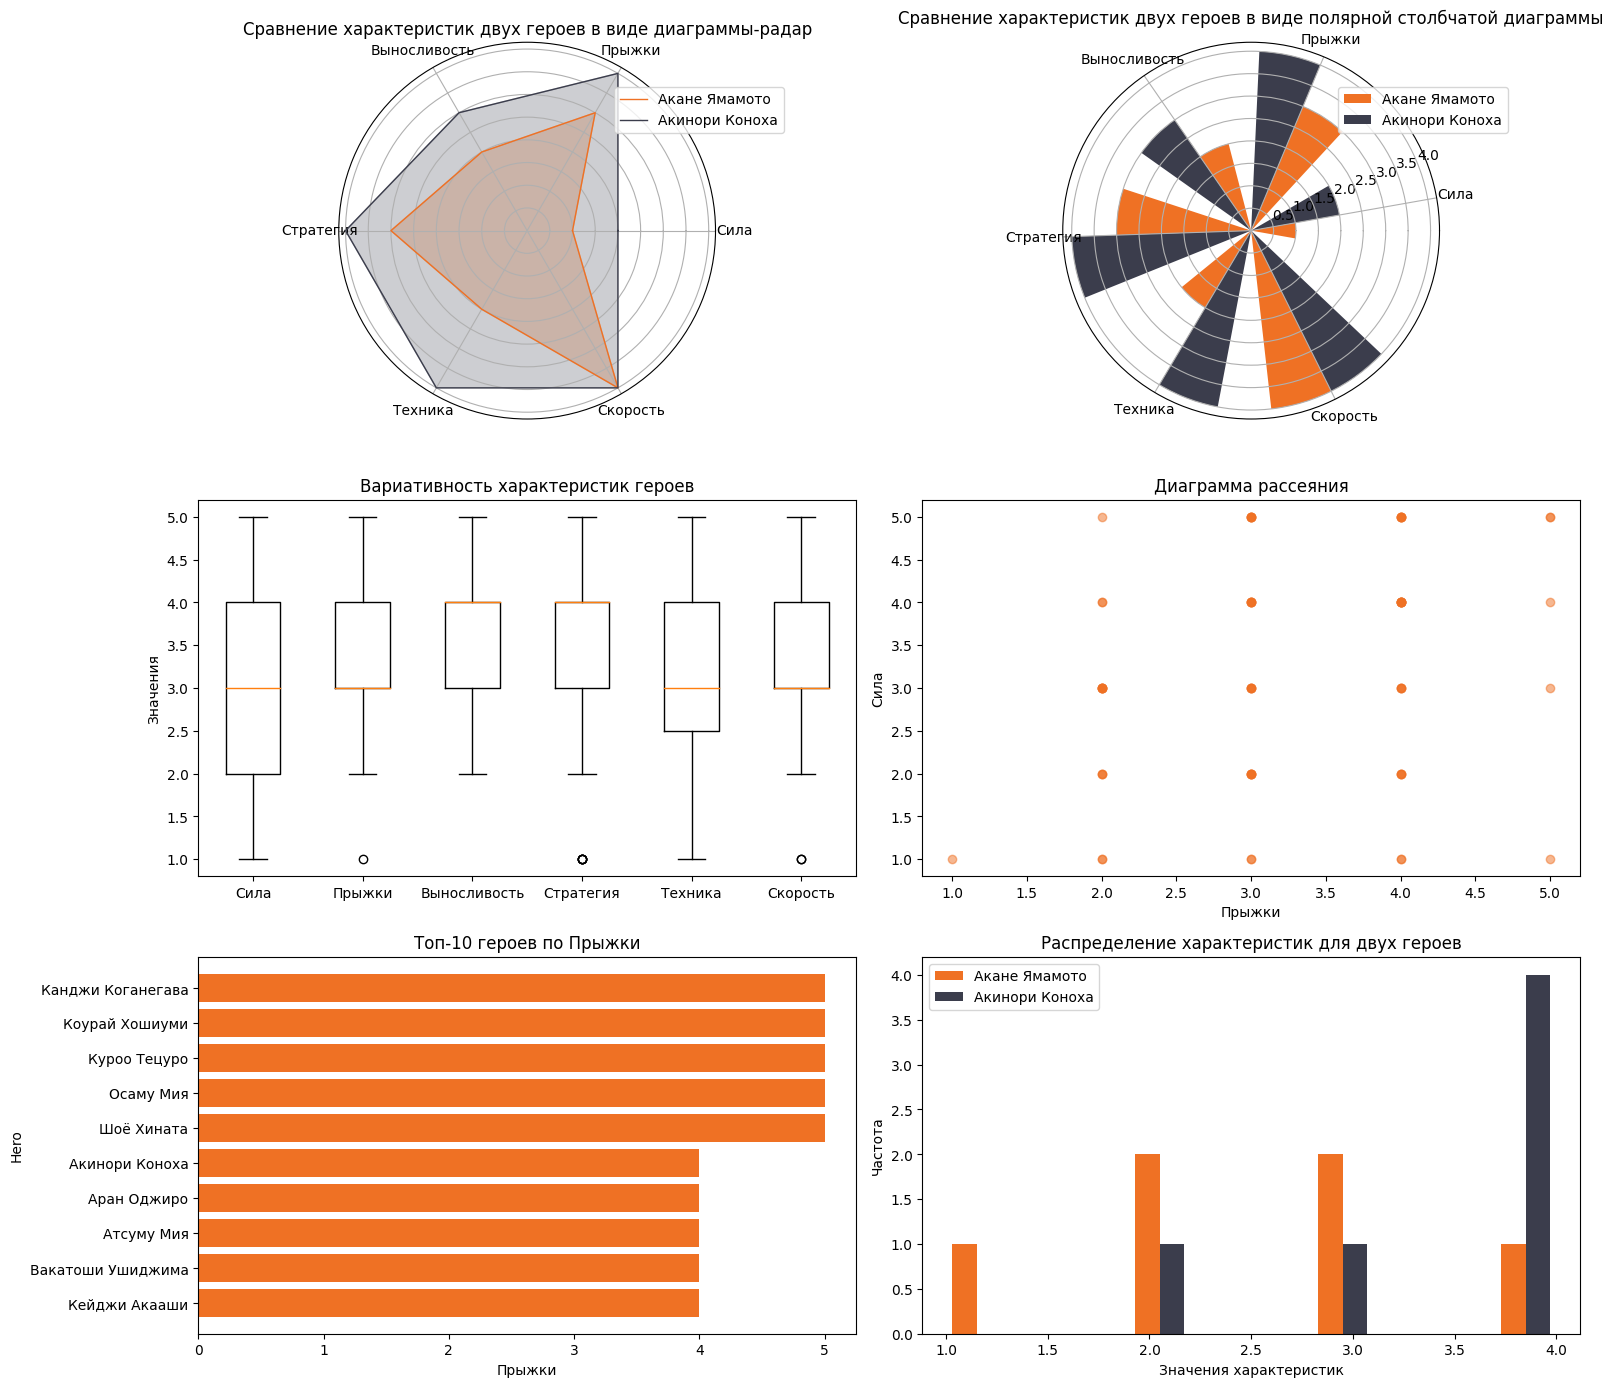

In [133]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('haikyuu_voleyball_infos.csv')

attributes = ['power', 'jumps', 'endurance', 'strategy', 'technique', 'speed']

attributes_translation = {
    'power': 'Сила',
    'jumps': 'Прыжки',
    'endurance': 'Выносливость',
    'strategy': 'Стратегия',
    'technique': 'Техника',
    'speed': 'Скорость'
}


heroes = df['hero'].unique()

hero1_selector = widgets.Dropdown(
    options=heroes,
    description='Hero 1',
    disabled=False
)

hero2_selector = widgets.Dropdown(
    options=heroes,
    description='Hero 2',
    disabled=False,
    value='Акинори Коноха'
)

x_axis_selector = widgets.Dropdown(
    options=attributes,
    description='X Axis:',
    disabled=False,
    value='jumps'
)

y_axis_selector = widgets.Dropdown(
    options=attributes,
    description='Y Axis:',
    disabled=False
)

def plot_hero_comparison(hero1, hero2, x_axis, y_axis):
    if not hero1 or not hero2:
        print("Please select both heroes.")
        return

    selected_data = df[df['hero'].isin([hero1, hero2])]

    data_hero1 = selected_data[selected_data['hero'] == hero1][attributes].values.flatten()
    data_hero2 = selected_data[selected_data['hero'] == hero2][attributes].values.flatten()

    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16, 14), subplot_kw={})

    # Построение радарной диаграммы
    ax1 = plt.subplot(321, polar=True)
    num_vars = len(attributes)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    for i, (hero, values) in enumerate(zip([hero1, hero2], [data_hero1, data_hero2])):
        values = values.tolist()
        values += values[:1]
        if i == 0:
            ax1.plot(angles, values, linewidth=1, linestyle='solid', label=hero, color='#ef7124') # Оранжевый цвет для первого героя
            ax1.fill(angles, values, alpha=0.25, color='#ef7124')
        else:
            ax1.plot(angles, values, linewidth=1, linestyle='solid', label=hero, color='#3b3d4c') # Серый цвет для второго героя
            ax1.fill(angles, values, alpha=0.25, color='#3b3d4c')
        #ax1.fill(angles, values, alpha=0.25)

    ax1.set_yticklabels([])
    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels([attributes_translation[attr] for attr in attributes])
    ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9))
    ax1.set_title('Сравнение характеристик двух героев в виде диаграммы-радар')


    ax2 = plt.subplot(322, polar=True) # убрать polar=True если нужна не закругленная а обычная
    bar_width = 0.35
    index = np.arange(len(attributes))

    bars1 = ax2.bar(index, data_hero1, bar_width, label=hero1, color='#ef7124')
    bars2 = ax2.bar(index + bar_width, data_hero2, bar_width, label=hero2, color='#3b3d4c')

    # ax2.set_xlabel('Атрибуты')
    # ax2.set_ylabel('Значения')
    ax2.set_title('Сравнение характеристик двух героев в виде полярной столбчатой диаграммы')
    ax2.set_xticks(index + bar_width / 2)
    ax2.set_xticklabels([attributes_translation[attr] for attr in attributes])
    ax2.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9))

    all_heroes_data = [selected_data[selected_data['hero'] == hero][attributes].values.flatten() for hero in heroes]


    # Построение box plot
    ax3 = plt.subplot(323)
    ax3.boxplot(df[attributes].values, labels=[attributes_translation[attr] for attr in attributes])
    ax3.set_title('Вариативность характеристик героев')
    ax3.set_ylabel('Значения')

    ax4 = plt.subplot(324)
    ax4.scatter(df[x_axis].values, df[y_axis].values, alpha=0.5, color='#ef7124')
    ax4.set_title('Диаграмма рассеяния')
    ax4.set_xlabel(attributes_translation[x_axis])
    ax4.set_ylabel(attributes_translation[y_axis])


    # Построение столбчатой диаграммы для Топ-10 героев по выбранной характеристике
    top10_heroes = df.nlargest(10, x_axis)[['hero', x_axis]]
    top10_heroes = top10_heroes.iloc[::-1]
    ax5 = plt.subplot(325)
    ax5.barh(top10_heroes['hero'], top10_heroes[x_axis], color='#ef7124')
    ax5.set_title('Топ-10 героев по ' + attributes_translation[x_axis])
    ax5.set_xlabel(attributes_translation[x_axis])
    ax5.set_ylabel('Hero')

    # Построение гистограммы для выбранной характеристики
    ax6 = plt.subplot(326)
    ax6.hist([data_hero1, data_hero2], bins=10, alpha=1, label=[hero1, hero2], color=['#ef7124', '#3b3d4c'])
    ax6.set_title('Распределение характеристик для двух героев')
    ax6.set_xlabel('Значения характеристик')
    ax6.set_ylabel('Частота')
    ax6.legend()


    plt.tight_layout()
    plt.show()



def on_heroes_change(change):
    clear_output(wait=True)
    display(hero1_selector, hero2_selector, x_axis_selector, y_axis_selector)
    plot_hero_comparison(hero1_selector.value, hero2_selector.value, x_axis_selector.value, y_axis_selector.value)

hero1_selector.observe(on_heroes_change, names='value')
hero2_selector.observe(on_heroes_change, names='value')

x_axis_selector.observe(on_heroes_change, names='value')
y_axis_selector.observe(on_heroes_change, names='value')

display(hero1_selector, hero2_selector, x_axis_selector, y_axis_selector)

plot_hero_comparison(hero1_selector.value, hero2_selector.value, x_axis_selector.value, y_axis_selector.value)